In [ ]:
import oci
import json

config = oci.config.from_file()

model_id = "meta.llama-4-scout-17b-16e-instruct" #"xai.grok-3-mini"
generative_ai_inference_client = oci.generative_ai_inference.GenerativeAiInferenceClient(config)

chat_request=oci.generative_ai_inference.models.GenericChatRequest(
            messages=[
                oci.generative_ai_inference.models.Message(
                    role="USER",
                    content=[
                        oci.generative_ai_inference.models.TextContent(
                            text="Hello, how are you?")])],
            is_stream=True,
            stream_options=oci.generative_ai_inference.models.StreamOptions(
                is_include_usage=True))

chat_details=oci.generative_ai_inference.models.ChatDetails(
        compartment_id=config["compartment_id"],
        serving_mode=oci.generative_ai_inference.models.OnDemandServingMode(
            serving_type="ON_DEMAND",
            model_id=model_id),
        chat_request=chat_request
        )

chat_response = generative_ai_inference_client.chat(chat_details=chat_details)

# Get the data from response
print(chat_response.data)

In [1]:
def get_image():
    import base64
    import mimetypes

    image_path = "./test/image.jpg"
    mime_type, _ = mimetypes.guess_type(image_path)
    with open(image_path, "rb") as image_file:
        base64_str = base64.b64encode(image_file.read()).decode('utf-8')
    url = f"data:{mime_type};base64,{base64_str}"
    print(url[:100])
    return url

image = get_image()

data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMTEhUSExIVFRUXFxUVFhUWFRUVFRUVFRUWFhUVF


{
  "embeddings": [
    [
      0.005340576,
      -0.013305664,
      -0.04345703,
      0.017578125,
      -0.0030517578,
      -0.053710938,
      -0.021362305,
      0.014343262,
      0.015197754,
      -0.040527344,
      -0.0030822754,
      0.017578125,
      -0.03466797,
      0.01361084,
      -0.00077819824,
      -0.028198242,
      -0.018310547,
      0.056396484,
      0.009094238,
      0.00680542,
      -0.005004883,
      -0.0015029907,
      -0.0016479492,
      -0.015258789,
      -0.030517578,
      -0.010864258,
      -0.03466797,
      -0.0134887695,
      0.028198242,
      0.025512695,
      -0.021362305,
      -0.0076293945,
      -0.06982422,
      0.017333984,
      -0.0390625,
      0.039794922,
      0.007171631,
      -0.009155273,
      -0.05078125,
      0.026367188,
      0.040527344,
      0.0021820068,
      0.016967773,
      -0.022705078,
      0.020385742,
      0.008361816,
      0.006591797,
      -0.03100586,
      -0.03466797,
      0.006378174
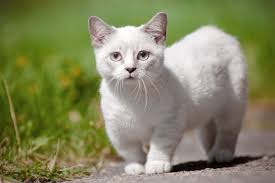

In [2]:
import oci    
config = oci.config.from_file()
generative_ai_inference_client = oci.generative_ai_inference.GenerativeAiInferenceClient(config)

embed_text_response = generative_ai_inference_client.embed_text(
    embed_text_details=oci.generative_ai_inference.models.EmbedTextDetails(
        inputs=[image],
        serving_mode=oci.generative_ai_inference.models.OnDemandServingMode(
            serving_type="ON_DEMAND",
            model_id="cohere.embed-v4.0"),
        compartment_id="ocid1.compartment.oc1..aaaaaaaals7mmltwjf3h2dfl3aflyxqgbsguk6b73mrn4oq7ywsl5r35lhjq",
        is_echo=True,
        truncate="NONE",
        input_type="IMAGE")
        )

# Get the data from response
print(embed_text_response.data)
